<a href="https://colab.research.google.com/github/Omer-Sella/qecc/blob/main/quantumCompilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compiling Quantum circuits
## At the highest level, the user might use any one of several possible programming languages (syntax) to describe an abstract quantum circuit. This is reffered to as the frontend. At the lowest level, the output will be an instruction set for a specific controller of qubits to initialize, appy some physical action like changing an electromagnetic field etc. The instruction set is specifict to a backend (usually device, or several devices that share some commonality).
## Between these two extremeties are intermediate representations (IR) of the circuit.
## To get from the frontend to the backend, we need some parameters (assumptions), usually provided by the backend.

# Frontend

1. Arbitrary number of qubits.
2. Arbitrary gates / unitary transformations / evolution gates
3. Classical computation, classical computation driven gates
4. Syntax / programming languages:
Open QASM (qiskit, pytket), Cirq, Penny Lane
```python
from qiskit.circuit import QuantumCircuit
abstract = QuantumCircuit(2)
abstract.h(0)
abstract.rz(0, 1)
abstract.cx(0, 1)
abstract.measure

from pytket import Circuit
abstract = Circuit(2,2)
abstract.H(0)
abstract.Rz(0.25, 0)   
abstract.CX(1, 0)      
abstract.measure_all()  

import cirq
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.Rz(rads = 0) (qubits[1])) # Notice this syntax !!!
circuit.append(cirq.CX(qubits[0], qubits[1]))
cirq.measure(qubits[0])

```






In [4]:
#@title { vertical-output: true}
try:
  __import__('qiskit')
except ImportError:
  !pip install --quiet qiskit
try:
  __import__('qiskit_ibm_runtime')
except:
  !pip install --quiet qiskit-ibm-runtime
try:
  __import__('pytket')
except:
    !pip install --quiet pytket-qiskit
    !pip install --quiet pytket-pyquil
try:
    __import__('cirq')
except ImportError:
    !pip install --quiet cirq
try:
    __import__('ucc')
except:
    !pip install --quiet ucc
    !pip install --quiet uv
    !git clone https://github.com/unitaryfoundation/ucc.git
    !cd ucc && uv sync --all-extras --all-groups
try:
  __import__('matplotlib')
except:
  !pip install --quiet matplotlib
try:
  __import__('pylatexenc')
except:
  !pip install --quiet pylatexenc
try:
  __import__('qbraid')
except:
  !pip install --quiet qbraid
try:
  __import__('pennylane')
except:
  !pip install --quiet pennylane


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━

# Syntax examples of some circuits and circuit drawing functions

       ┌───┐       ┌─┐   
q_0: ──┤ H ├────■──┤M├───
     ┌─┴───┴─┐┌─┴─┐└╥┘┌─┐
q_1: ┤ Rz(0) ├┤ X ├─╫─┤M├
     └───────┘└───┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1 


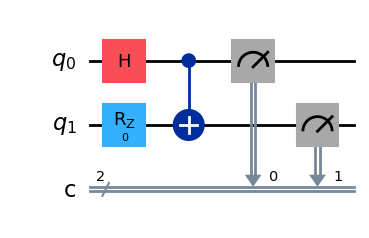

In [5]:
#@title { vertical-output: true}
# Qiskit example:
from qiskit import QuantumCircuit
from matplotlib import pyplot as plt
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
abstract = QuantumCircuit(2,2)
abstract.h(0)
abstract.rz(0, 1)
abstract.cx(0, 1)
abstract.measure(0,0)
abstract.measure(1,1)
print(abstract)
circuit_drawer(abstract, output = "mpl")
#abstract.draw('mpl')

In [6]:
#@title { vertical-output: true}
# Pytket example:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter
abstractPyTket = Circuit(2,2)
abstractPyTket.H(0)
abstractPyTket.Rz(0, 1)
abstractPyTket.CX(0, 1)
abstractPyTket.measure_all()
render_circuit_jupyter(abstractPyTket)


In [7]:
#@title { vertical-output: true}
import cirq
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.Rz(rads = 0) (qubits[1])) # Notice this syntax !!!
circuit.append(cirq.CX(qubits[0], qubits[1]))
cirq.measure(qubits[0])
print(circuit)

0: ───H───────@───
              │
1: ───Rz(0)───X───


In [8]:
#@title { vertical-output: true}
# Interoperability between qasm and pytket
# Save abstract to qasm file:
from qiskit.qasm2 import dumps
qasm_string = dumps(abstract)
with open("abstractCircuit.qasm", "w") as f:
    f.write(qasm_string)

from pytket.qasm import circuit_from_qasm
c = circuit_from_qasm("abstractCircuit.qasm")
c.measure_all()
render_circuit_jupyter(c)

# Interoperability between languages and platforms provided by qbraid

There are actually a lot more programming languages for quantum computing.
Below is a graph provided by qbraid, that shows how qbraid can transition from one language (syntax) to another:


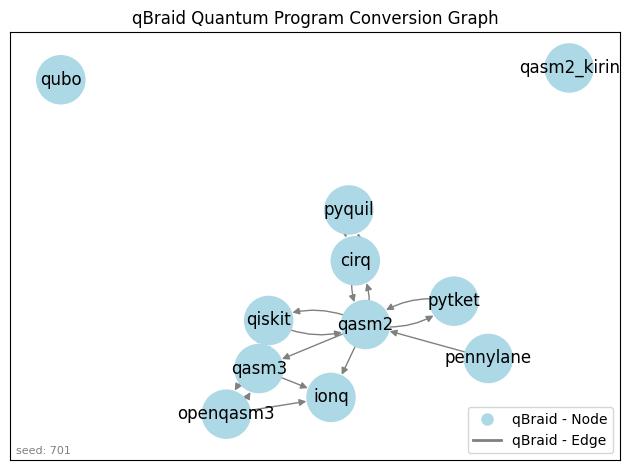

cirq

qiskit

pennylane

pyquil

pytket

openqasm3

qasm3

qasm2

qasm2_kirin

ionq

qubo



In [9]:
#@title { vertical-output: true}
print(f"There are actually a lot more programming languages for quantum computing.")
print(f"Below is a graph provided by qbraid, that shows how qbraid can transition from one language (syntax) to another:")
from qbraid import ConversionGraph
# Loads native conversions from QPROGRAM_REGISTRY
graph = ConversionGraph()
graph.plot(legend=True)
from qbraid import QPROGRAM_REGISTRY
for key in QPROGRAM_REGISTRY.keys():
  print(f"{key}\n")


#  Compiler parameters
Parameters that a compiler should take into account –

Coupling map (Qubit connectivity matrix (maybe including distance ?))

Supported 1 qubit gates

supported 2 qubit gates

Error rates per qubit

Error rates per gate

Example (from [tour de gross](https://arxiv.org/abs/2506.03094))


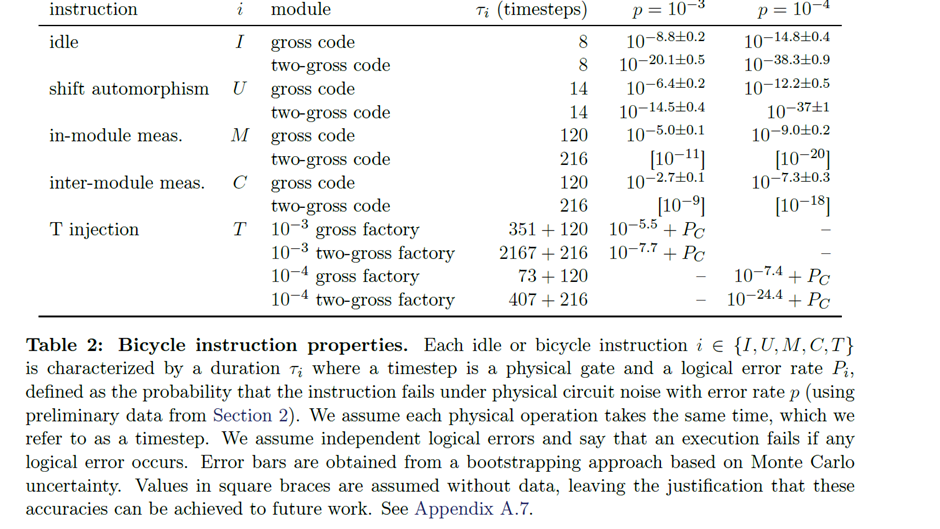

In [10]:
#@title { vertical-output: true}
#Example compilations
num_qubits = 3
ghz = QuantumCircuit(num_qubits)
ghz.h(range(num_qubits))
ghz.cx(0, range(1, num_qubits))
op_counts = ghz.count_ops()
circuit = ghz
print(f"Start with a quantum circuit :{circuit}")
operationCounts = circuit.count_ops()
print("Pre-Transpilation: ")
[print(f"{key} gates: {operationCounts[key]}") for key in operationCounts.keys()]

print(f"We will need to define a backend to compile the circuit into:")
from qiskit_ibm_runtime.fake_provider import FakeMarrakesh, FakeEssexV2
print(f"Marrakesh: {FakeMarrakesh()}")
print(f"Next we will need a pass manager, that will compile our circuit to the choice of backend:")
from qiskit.transpiler import generate_preset_pass_manager
passManager = generate_preset_pass_manager(optimization_level=3, backend=FakeMarrakesh())
transpiledCircuit = passManager.run(circuit)
operationCounts = transpiledCircuit.count_ops()

print("Post-Transpilation: ")
[print(f"{key} gates: {operationCounts[key]}") for key in operationCounts.keys()]
physical = passManager.run(circuit)
print(physical)

print(f"But be aware that this intermediate representation is not the final output of a compiler.")

Start with a quantum circuit :     ┌───┐          
q_0: ┤ H ├──■────■──
     ├───┤┌─┴─┐  │  
q_1: ┤ H ├┤ X ├──┼──
     ├───┤└───┘┌─┴─┐
q_2: ┤ H ├─────┤ X ├
     └───┘     └───┘
Pre-Transpilation: 
h gates: 3
cx gates: 2
We will need to define a backend to compile the circuit into:
Marrakesh: <qiskit_ibm_runtime.fake_provider.backends.marrakesh.fake_marrakesh.FakeMarrakesh object at 0x7c5e7535d310>
Next we will need a pass manager, that will compile our circuit to the choice of backend:
Post-Transpilation: 
rz gates: 6
sx gates: 3
cz gates: 2
global phase: 3π/4
                                         ┌─────────┐   ┌────┐  ┌─────────┐»
q_1 -> 12 ─────────────────────────────■─┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├»
          ┌─────────┐┌────┐┌─────────┐ │ └─────────┘   └────┘  └─────────┘»
q_0 -> 13 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■──────■───────────────────────────»
          └─────────┘└────┘└─────────┘        │     ┌─────────┐   ┌────┐  »
q_2 -> 14 ────────────────────────────────────■─────┤

# Compilation example

In [11]:
#@title { vertical-output: true}
print(f"Seems to be different than the way it works for pytket:")
from pytket import Circuit
from pytket.extensions.qiskit import AerBackend
# Define Circuit
circ = Circuit(num_qubits)
[circ.H(i) for i in range(num_qubits)]
[circ.CX(0, i) for i in range(1,num_qubits)]
render_circuit_jupyter(circ)
# Initialise Backend and execute the Circuit
backend = AerBackend()
print(backend.backend_info)
result = backend.run_circuit(circ, n_shots=1000)
print(result.get_counts())

Seems to be different than the way it works for pytket:


BackendInfo(name='AerBackend', device_name='aer_simulator', version='0.77.0', architecture=<tket::FullyConnected, nodes=40>, gate_set={OpType.Barrier, OpType.RangePredicate, OpType.Z, OpType.X, OpType.Y, OpType.S, OpType.Sdg, OpType.T, OpType.Tdg, OpType.SX, OpType.SXdg, OpType.H, OpType.Rx, OpType.Ry, OpType.Rz, OpType.U3, OpType.U2, OpType.U1, OpType.TK1, OpType.CX, OpType.CY, OpType.CZ, OpType.CSX, OpType.CRz, OpType.CRx, OpType.CRy, OpType.CU1, OpType.CU3, OpType.CCX, OpType.SWAP, OpType.CSWAP, OpType.noop, OpType.Measure, OpType.Reset, OpType.ECR, OpType.PhasedX, OpType.XXPhase, OpType.YYPhase, OpType.ZZPhase, OpType.CnX, OpType.CnZ, OpType.Unitary1qBox, OpType.Unitary2qBox, OpType.Unitary3qBox, OpType.StatePreparationBox, OpType.Conditional}, n_cl_reg=None, supports_fast_feedforward=True, supports_reset=False, supports_midcircuit_measurement=True, all_node_gate_errors=None, all_edge_gate_errors=None, all_readout_errors=None, averaged_node_gate_errors=None, averaged_edge_gate_erro

# Compiler parameters can come from backends

We can try to probe some backends for insights:
Backend name: fake_marrakesh


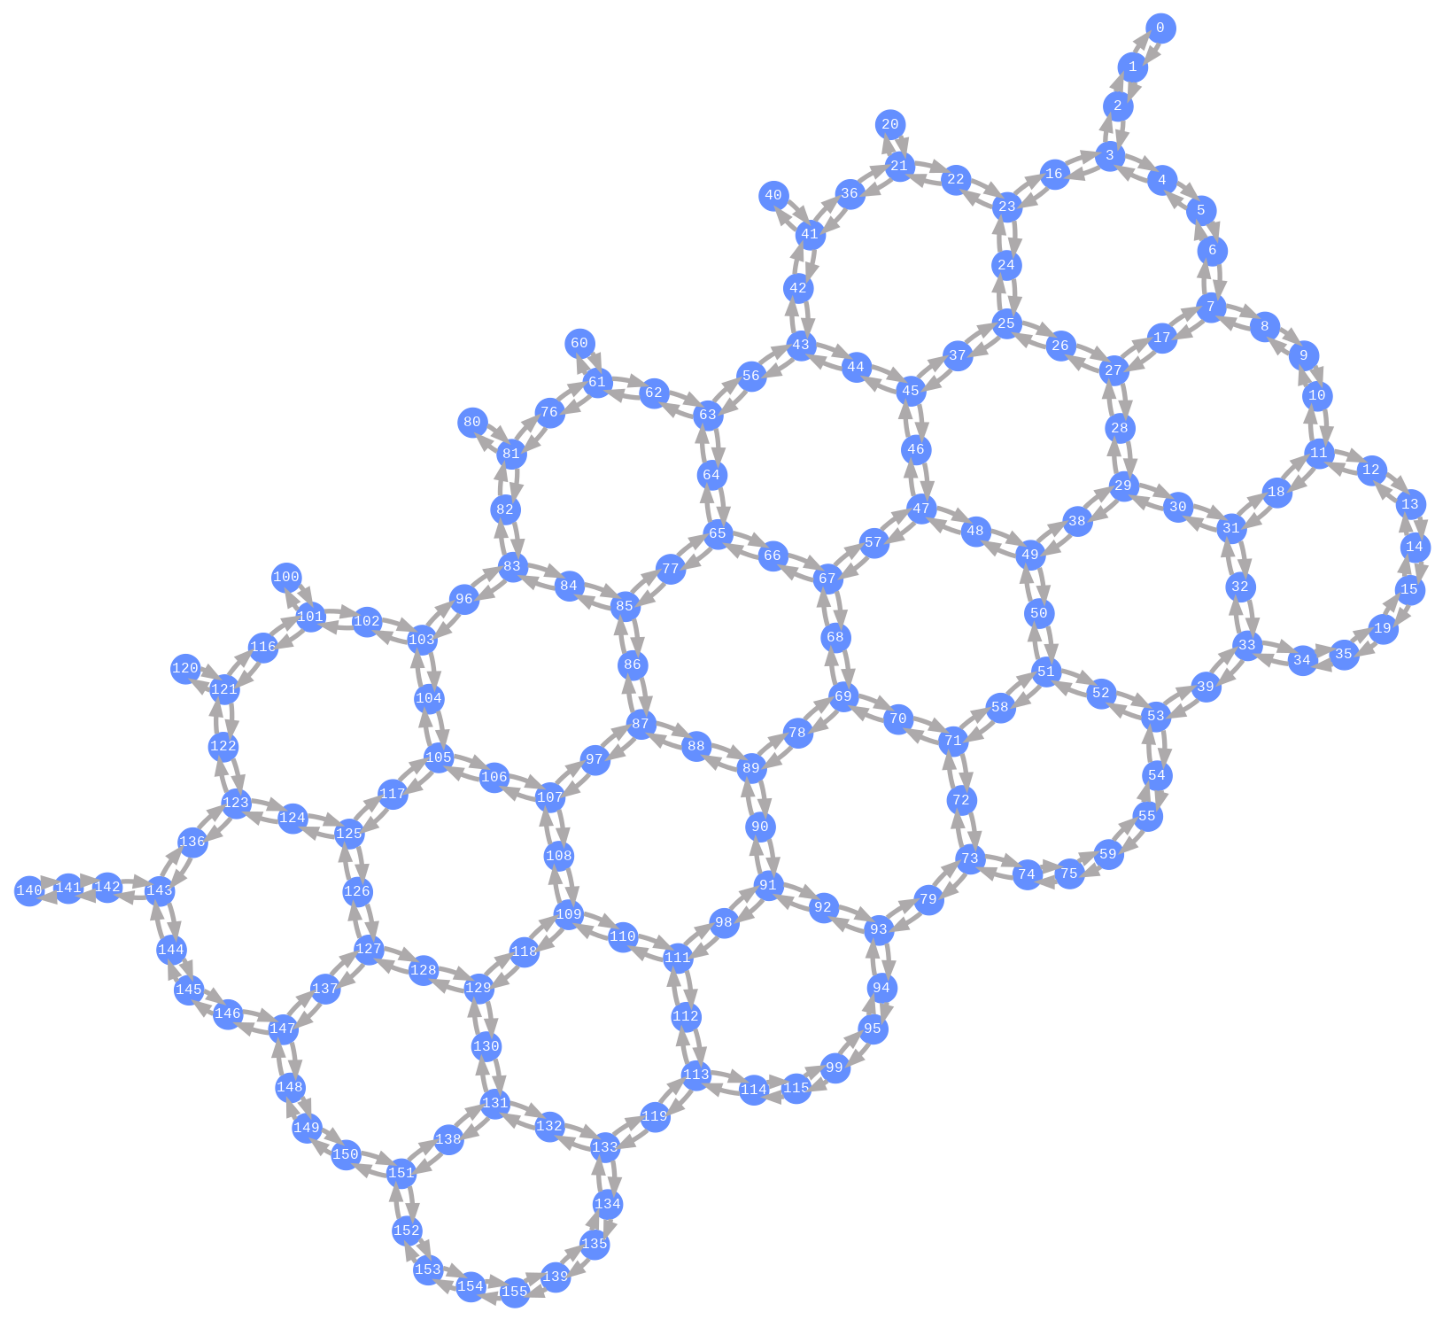

In [27]:
#@title { vertical-output: true}
print(f"We can try to probe some backends for insights:")
# Check out this link from ibm https://qiskit.qotlabs.org/docs/guides/custom-backend
from qiskit_ibm_runtime.fake_provider import FakeMarrakesh, FakeEssexV2
import numpy as np
import rustworkx as rx
from qiskit.providers import BackendV2, Options
from qiskit.transpiler import Target, InstructionProperties
from qiskit.circuit.library import XGate, SXGate, RZGate, CZGate, ECRGate
from qiskit.circuit import Measure, Delay, Parameter, Reset
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_gate_map
from qiskit_ibm_runtime import QiskitRuntimeService
backend = FakeMarrakesh()
target = backend.target
coupling_map_backend = target.build_coupling_map()
line_colors = ["#adaaab" for edge in coupling_map_backend.get_edges()]

print(f"Backend name: {backend.name}")
plot_gate_map(
    backend,
    plot_directed=True,
    line_color=line_colors,
)



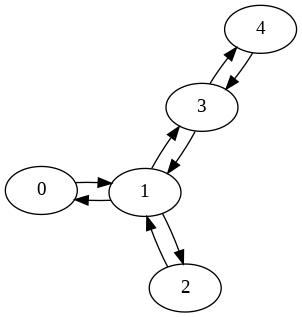

In [30]:
#@title { vertical-output: true}
from qiskit.transpiler import CouplingMap
backend = FakeEssexV2()
target = backend.target
coupling_map = target.build_coupling_map()
cmap = CouplingMap(coupling_map)
cmap.draw()


## We can see how the qiskit transpiler (compiler, but called transpiler in qiskit) converts our set of (general, abstract) gates into target specific gates, by setting the [transpiler optimzation level](https://quantum.cloud.ibm.com/docs/en/guides/set-optimization) to 0.

In [22]:
#@title { vertical-output: true}
targetGateset = {"cx", "rz", "rx", "ry", "h"}
basis_translated_circuit = qiskit_transpile(abstract,
        basis_gates=targetGateset,
        optimization_level=0,
    )
circuit_drawer(basis_translated_circuit, output = "mpl")
print(f"To make this interesting, let's find out some possible target gatesets:")
from qiskit_ibm_runtime.fake_provider import FakeProviderForBackendV2
# Create a fake provider instance
fake_provider = FakeProviderForBackendV2()
# List all available fake backends
backends = fake_provider.backends()
print("Available Fake Backends:")
for backend in backends:
    print(f"---- Backend name: {backend.name} --------")
    target = backend.target
    targetGateset = target.operation_names
    print(f"Target Gateset: {target.operation_names}")
    try:
      basis_translated_circuit = qiskit_transpile(abstract,
          basis_gates=targetGateset,
          optimization_level=0)
      #circuit_drawer(basis_translated_circuit, output = "mpl")
      print(basis_translated_circuit)
    except:
      print(f"Transpilation failed")



To make this interesting, let's find out some possible target gatesets:
Available Fake Backends:
---- Backend name: fake_algiers --------
Target Gateset: dict_keys(['delay', 'for_loop', 'rz', 'measure', 'id', 'reset', 'if_else', 'switch_case', 'cx', 'sx', 'x'])
global phase: π/4
     ┌─────────┐┌────┐┌─────────┐     ┌─┐   
q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├───
     └┬───────┬┘└────┘└─────────┘┌─┴─┐└╥┘┌─┐
q_1: ─┤ Rz(0) ├──────────────────┤ X ├─╫─┤M├
      └───────┘                  └───┘ ║ └╥┘
c: 2/══════════════════════════════════╩══╩═
                                       0  1 
---- Backend name: fake_almaden --------
Target Gateset: dict_keys(['id', 'u1', 'cx', 'u3', 'u2'])
     ┌─────────┐     ┌─┐   
q_0: ┤ U2(0,π) ├──■──┤M├───
     └┬───────┬┘┌─┴─┐└╥┘┌─┐
q_1: ─┤ U1(0) ├─┤ X ├─╫─┤M├
      └───────┘ └───┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1 
---- Backend name: fake_armonk --------
Target Gateset: dict_keys(['delay', 'id', 'sx', 'rz', 'x', 'measure'])

# Intermediate representation considering layout

In this example, we explore the differences between optimization levels.
The important thing to note herte is that the optimization level is set to 0, meaning no layout optimization.


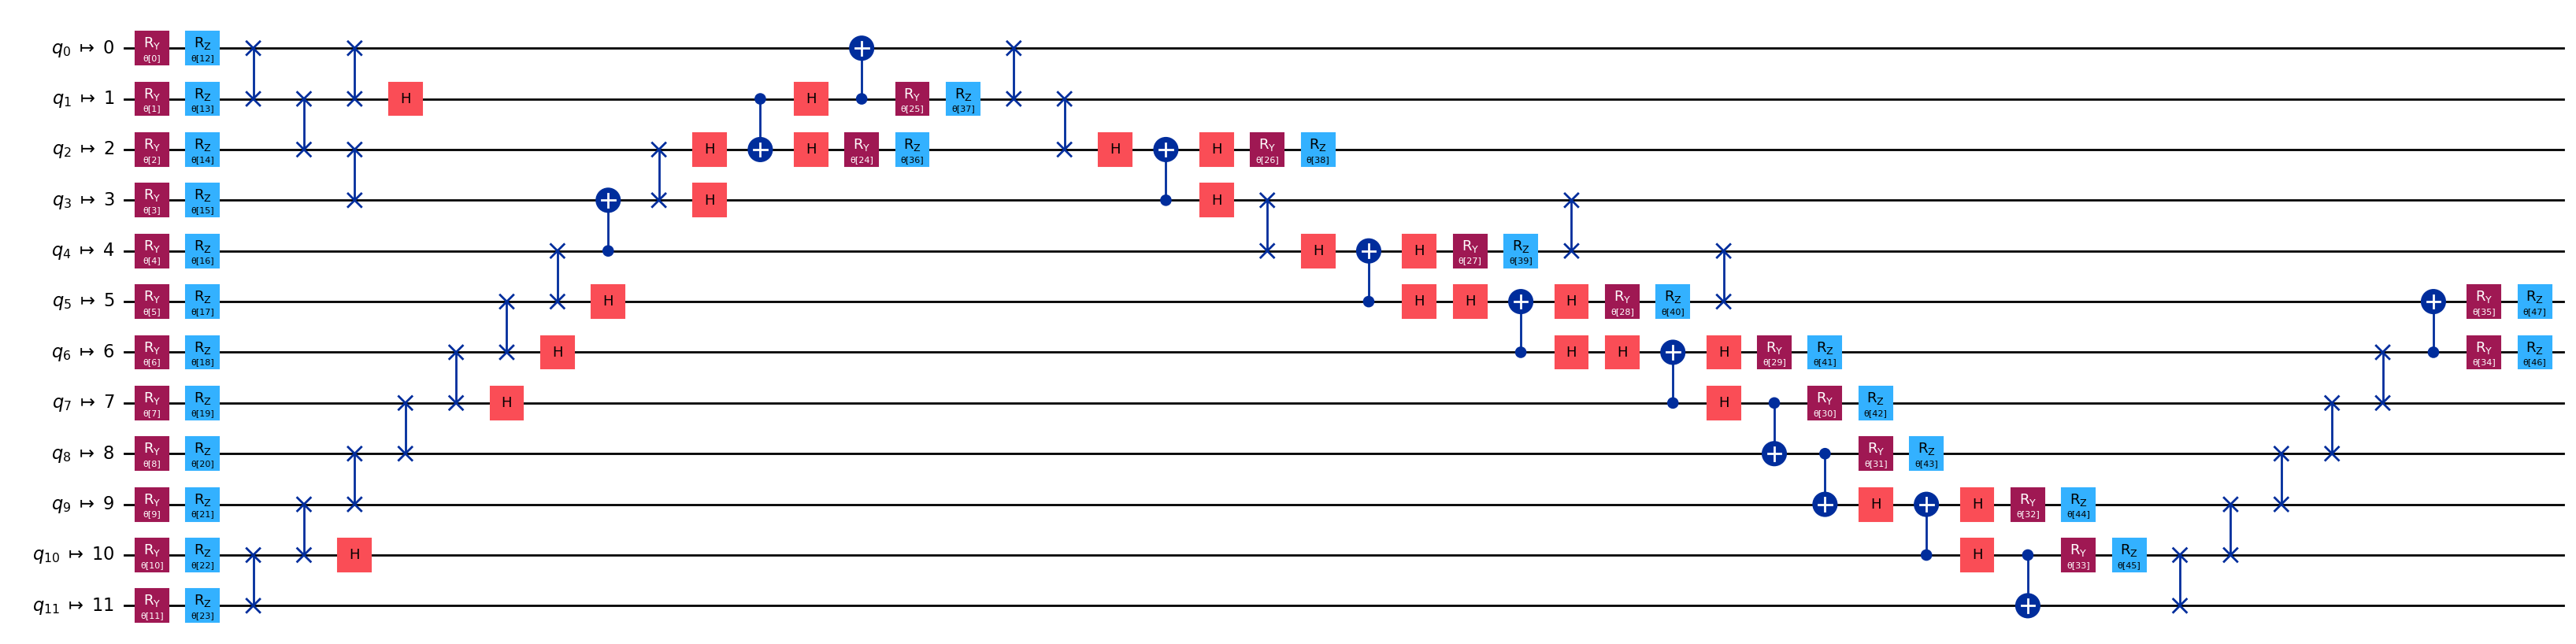

In [42]:
print(f"In this example, we explore the differences between optimization levels.")
from qiskit.visualization import plot_circuit_layout
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit.circuit.library import efficient_su2

qc = efficient_su2(12, entanglement="circular", reps=1)
backend = FakeSherbrooke()
target = backend.target

coupling_map = target.build_coupling_map()
print(f"The important thing to note herte is that the optimization level is set to 0, meaning no layout optimization.")
pass_manager = generate_preset_pass_manager(optimization_level=0, coupling_map=coupling_map, seed_transpiler=12345)
qc_t_cm_lv0 = pass_manager.run(qc)
qc_t_cm_lv0.draw("mpl", idle_wires=False, fold=-1)


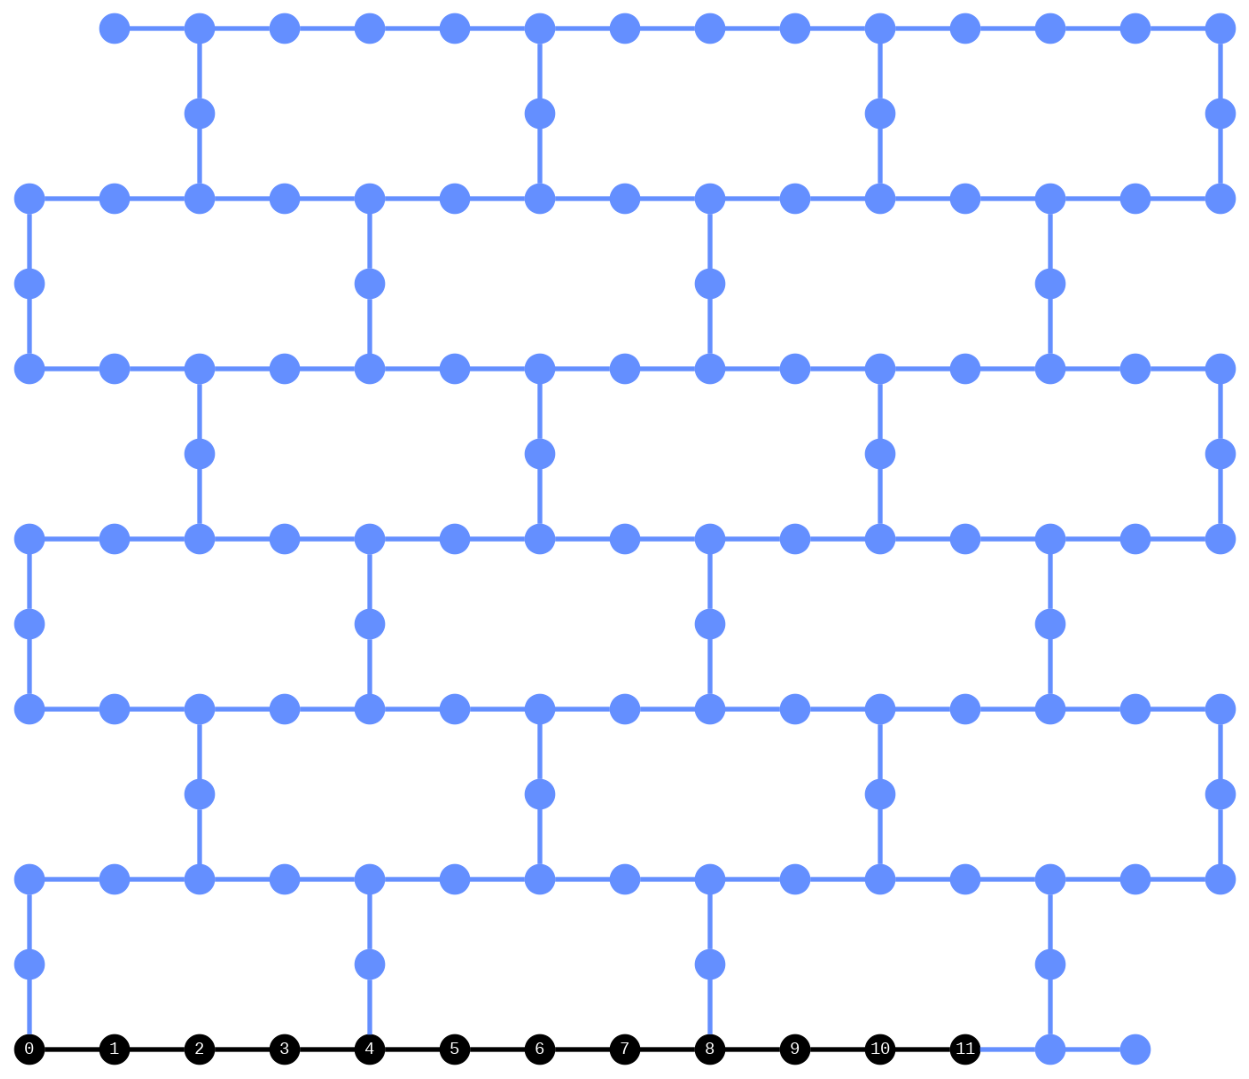

In [43]:
plot_circuit_layout(qc_t_cm_lv0, backend, view="physical")

Next we try optimization level == 1


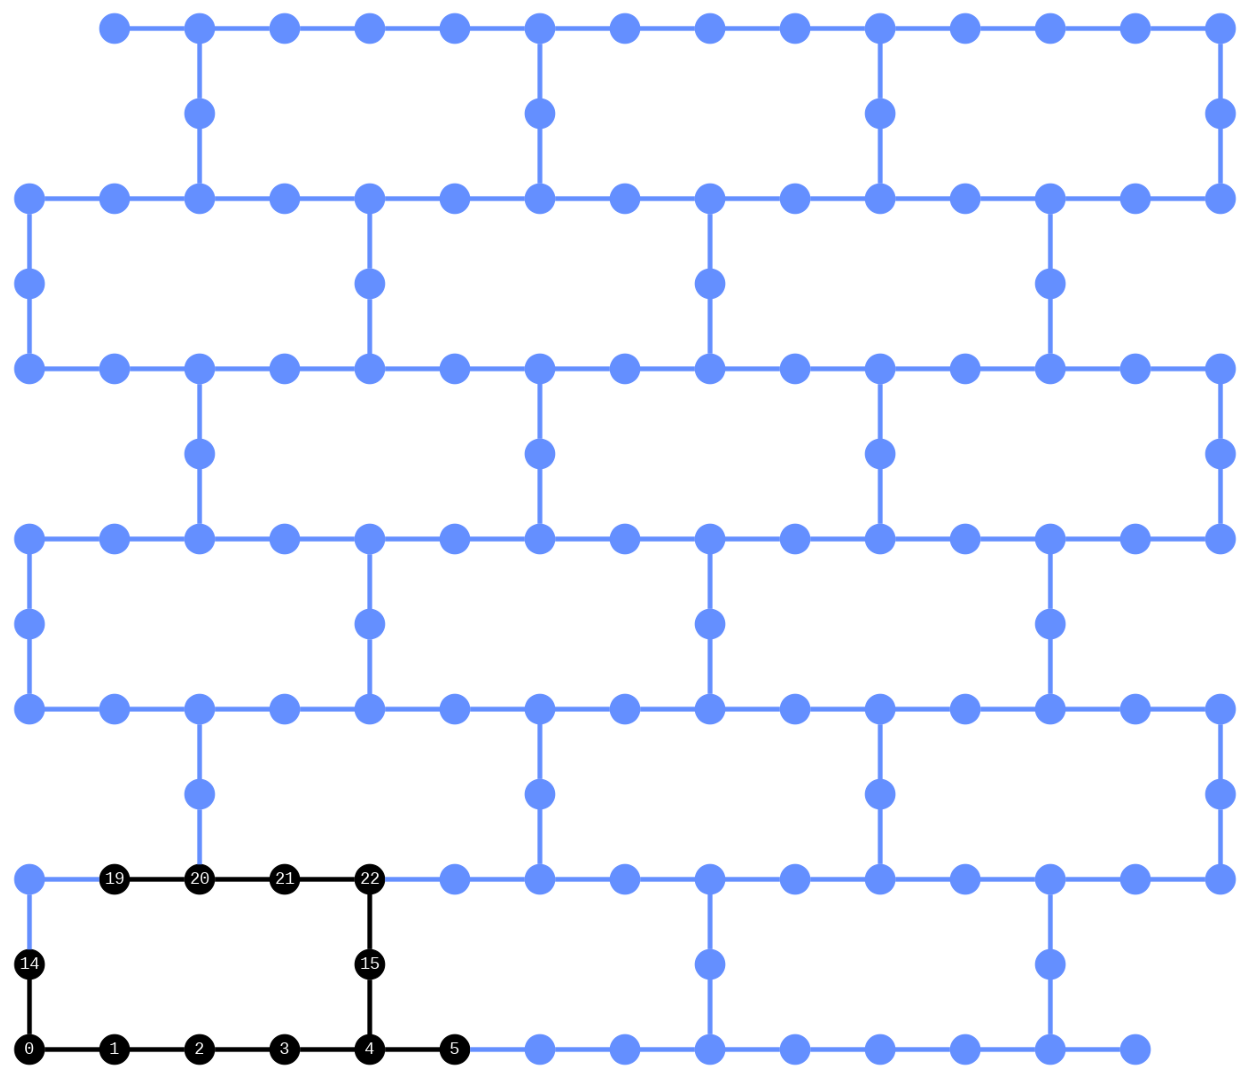

In [45]:
print(f"Next we try optimization level == 1")
pass_manager = generate_preset_pass_manager(optimization_level=1, coupling_map=coupling_map, seed_transpiler=12345)
qc_t_cm_lv0 = pass_manager.run(qc)
#qc_t_cm_lv0.draw("mpl", idle_wires=False, fold=-1)
plot_circuit_layout(qc_t_cm_lv0, backend, view="physical")

# Compiler output, and intermediate representation

(in the case of IBM) – a recipe (in time) saying when to apply which microwave pulse.
Tell the waveform generators when to swich on/off and for how long.
Operate the digitizers (that tell the classical value of a qubit).
This assumes that everything is synchronized
Eventually it’s binaries that run the controllers.

Instructions examples:

Delay(value)

Receive from

Evaluate

Send message to

Digitizer measure, send, delay

       ┌───┐       ┌─┐   
q_0: ──┤ H ├────■──┤M├───
     ┌─┴───┴─┐┌─┴─┐└╥┘┌─┐
q_1: ┤ Rz(0) ├┤ X ├─╫─┤M├
     └───────┘└───┘ ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1 
Note that the matplotlib drawing will not show if you transpile in cell, 
which is why in the next cell we will only print the circuit, 
as opposed to drawing it.


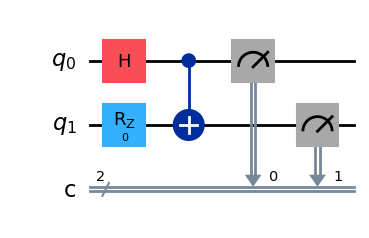

In [13]:
#@title { vertical-output: true}
# Deep dive into the qiskit transpiler
from qiskit import transpile as qiskit_transpile
from qiskit import QuantumCircuit
from matplotlib import pyplot as plt
from qiskit.visualization import circuit_drawer
abstract = QuantumCircuit(2,2)
abstract.h(0)
abstract.rz(0, 1)
abstract.cx(0, 1)
abstract.measure(0,0)
abstract.measure(1,1)
print(abstract)
print(f"Note that the matplotlib drawing will not show if you transpile in cell, \nwhich is why in the next cell we will only print the circuit, \nas opposed to drawing it.")
circuit_drawer(abstract, output = "mpl")



In [15]:
print(dir(basis_translated_circuit))

['__and__', '__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iand__', '__init__', '__init_subclass__', '__ixor__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '__xor__', '_ancillas', '_append', '_append_standard_gate', '_base_name', '_builder_api', '_cast', '_cbit_argument_conversion', '_check_dups', '_clbit_indices', '_clbit_write_latency', '_cls_instances', '_cls_prefix', '_conditional_latency', '_control_flow_scopes', '_create_creg', '_create_qreg', '_current_scope', '_data', '_duration', '_from_circuit_data', '_increment_instances', '_layout', '_metadata', '_name_update', '_op_start_times', '_peek_previous_instruction_in_scope', '_pop_previous_instruction_in_scope', '_pop_scope', '_prepare_n

In [16]:
#Investigation into the unitary foundation compiler (ucc)
from ucc import compile

from pytket import Circuit as TketCircuit
from cirq import Circuit as CirqCircuit
from qiskit import QuantumCircuit as QiskitCircuit
from cirq import H, CNOT, LineQubit

circuit = QiskitCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
compiledCircuit = compile(circuit)

# We can also try cirq:
# def test_cirq_compile():
#     qubits = LineQubit.range(2)
#     circuit = CirqCircuit(
#         H(qubits[0]),
#         CNOT(qubits[0], qubits[1]))
#     compile(circuit)
compiledCircuit.count_ops()
dir(compiledCircuit)


['__and__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_ancillas',
 '_append',
 '_append_standard_gate',
 '_base_name',
 '_builder_api',
 '_cast',
 '_cbit_argument_conversion',
 '_check_dups',
 '_clbit_indices',
 '_clbit_write_latency',
 '_cls_instances',
 '_cls_prefix',
 '_conditional_latency',
 '_control_flow_scopes',
 '_create_creg',
 '_create_qreg',
 '_current_scope',
 '_data',
 '_duration',
 '_from_circuit_data',
 '_increment_instances',
 '_layout',
 '_metadata',
 '_name_update',
 '_op_start_times',
 '_peek_previous_instruction_in_scope',
 '_

General dump:





Cirq has a [transformer](https://quantumai.google/cirq/transform/transformers) class which contains transform to target hardware. You can write your own transform.

Qiskit has a more baked tool, which seems to allow plugins, but ultimately seems to compile to their architecture.

[Intro to Transpilation](https://www.youtube.com/watch?v=TmXlUUFMUgI) - Matthew Treinish - QDC24

[Transforming Quantum Circuits using Qiskit's Transpiler](https://www.youtube.com/watch?v=MvX5OUK-tbE) with Matthew Treinish: Qiskit Summer School

[Building a Compiler for Quantum Computers](https://www.youtube.com/watch?v=L2P501Iy6J8) - Matthew Treinish (LCA 2020)

Not all qubits support the same gates
Qubits may have limited connectivity
That’s why layout is critical, and we need to optimize the layout.


We can use swap gates to move states to compensate for connectivity, but that introduces noise.


QISKIT uses a directed acyclic graph implemented in rust.
VF2Layout pass
Checkout rustworkx
SabreLayout pass
VF2PostLayout pass
Translation stage
High level synthesis pass –
plugin that allows stuff like Clifford gates and Pauli evolution gate or any custom gate, and translates it to supported gates.
Unitary synthesis pass
Optimization stage


Compiler Tool Comparison - Elena Peña Tapia - QDC24
You can write a Qiskit plugin
What are my target metrics ?
1.	2qubit gate count ?
2.	Routing ?
3.	Depth ?
4.	Transpilation time ?
Check out Julian + rustx plugin
HLSConfig

Quantinuum Guest Speaker Session at UTQC: TKET The Advanced Quantum SDK for the NISQ era
(Not a great source of information.)

2023 LLVM Dev Mtg - LLVM-based Compilers for Quantum Computing
cirq.optimize_for_target_gateset  |  Cirq  |  Google Quantum AI
On the problem of routing qubits
Qubit mapping and routing - pytket user guide
 1902.08091

Follow up on:
QIBO Qibo · v0.2.23


A lot of compilers seem to rely on this package [rustrorkx](https://www.rustworkx.org/)


Quantum device manufacturers, qubit architectures and their documentation on compiling to their hardware:

[IonQ](https://docs.ionq.com/sdks/qiskit/native-gates-qiskit) use trapped ions. They also recently baught [Oxford Ionics](https://www.oxionics.com/products/)

[Quantum motion](https://quantummotion.com/)

[Quandela](https://www.quandela.com/)

Psi Quantum

Atom computing

QEra

Pasqal

Planqc

Riggetti

IBM

[Quantinuum](https://www.quantinuum.com/)

[An Introduction to Cartan's KAK Decomposition for QC Programmers](https://arxiv.org/abs/quant-ph/0507171)

agnostiq

Atlantic Quantum

Anyon Technologies

[Diraq](https://www.diraq.com/publications) ?

[Infleqtion](https://infleqtion.com/quantum-computing/) neutral atom

[IQM](https://meetiqm.com/technology/tech-stack/) superconducting

[Orca Computing](https://orcacomputing.com/technology/) photonic

[OQC](https://oqc.tech/tech/) superconducting

[Planqc](https://planqc.eu/technology/neutral-atom-qc) neutral atom

[qci](https://quantumcomputinginc.com/) ?

[QPerfect](https://qperfect.io/) neutral atom

[Quantum Brilliance](https://quantumbrilliance.com/quantum-brilliance-qristal) nitrogen vacancy

[Qudora](https://qudora.com/) ion traps

[Quobly](https://quobly.io/) ?

[Seeqc](https://seeqc.com/foundry-services) superconducting

[Terra Quantum](https://terraquantum.swiss/quantum-computing/) superconducting